# Bode Plot

by Jeffrey Kantor  (jeff at nd.edu). The latest version of this notebook is available at [https://github.com/jckantor/CBE30338](https://github.com/jckantor/CBE30338). 

Demonstrate the contruction of a Bode Plot using the  [Python Control Systems Library](https://github.com/python-control/python-control).

### How to Specify a Transfer Function

Given a transfer function with time delay

$$G_p(s) = \frac{0.2 e^{-0.25s}}{s^2 + 0.5 s + 1}$$

the task is to construct a Bode plot.

The Python Control Systems Library does not provide a specific representation for time delay. It does, however, provide a function `pade` for creating high-order Pade approximations to time delay systems.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from control.matlab import *

(num_delay,den_delay) = pade(0.25,3)

Gp = tf([0.2],[1, 0.5, 1])*tf(num_delay,den_delay)
Gp


         -0.2 s^3 + 9.6 s^2 - 192 s + 1536
---------------------------------------------------
s^5 + 48.5 s^4 + 985 s^3 + 8208 s^2 + 4800 s + 7680

/Users/jeff/anaconda/lib/python3.5/site-packages/control/freqplot.py:153: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(True);
/Users/jeff/anaconda/lib/python3.5/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/Users/jeff/anaconda/lib/python3.5/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in 3.0")
/Users/jeff/anaconda/lib/python3.5/site-packages/control/freqplot.py:163: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  

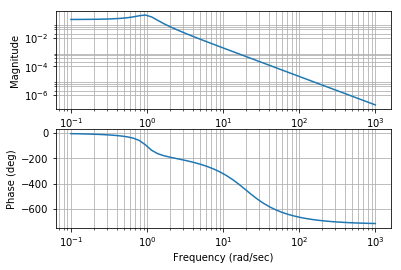

In [4]:
mag,phase,omega = bode(Gp);

### Specify Frequency Range

The default frequency range created by `bode` is often too wide. Fortunately, it is possible to specify the frequency axis in radians using the `numpy.logspace` function.

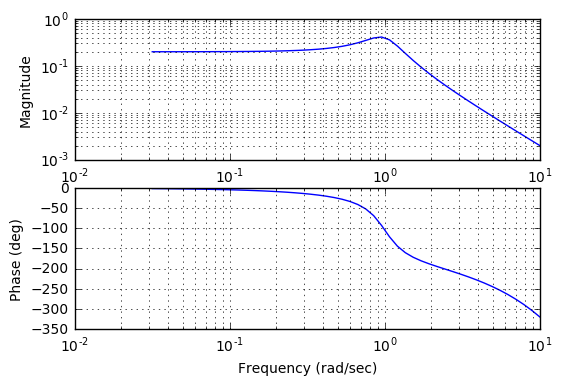

In [3]:
w = np.logspace(-1.5,1)
mag,phase,omega = bode(Gp,w)

### Set Plotting Options

Bode plots can be customized with several key options, as demonstrated here.

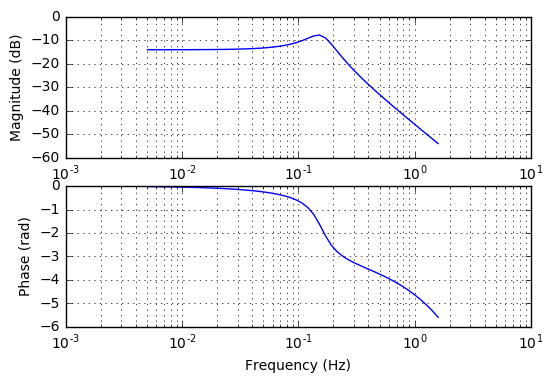

In [4]:
mag,phase,omega = bode(Gp,w,Hz=True,dB=True,deg=False)

### Adding Features to the Bode Plot

In addition to creating plots, the `bode` function returns numpy arrays containing the magnitude, phase, and frequency.  This data can be used to annotate or add features to a Bode plot. The following cell interpolates the phase data to find the crossover frequency, then interpolates the magnitude data to find the gain at crossover.

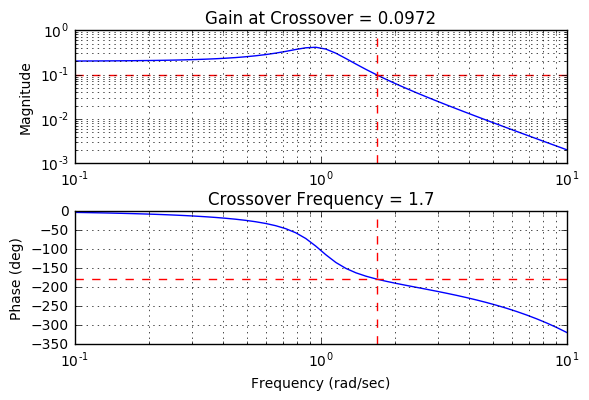

In [5]:
w = np.logspace(-1,1)
mag,phase,omega = bode(Gp,w)
plt.tight_layout()

# find the cross-over frequency and gain at cross-over
wc = np.interp(-180.0,np.flipud(phase),np.flipud(omega))
Kcu = np.interp(wc,omega,mag)

# get the subplots axes
ax1,ax2 = plt.gcf().axes

# add features to the magnitude plot
plt.sca(ax1)
plt.plot(plt.xlim(),[Kcu,Kcu],'r--')
plt.plot([wc,wc],plt.ylim(),'r--')
plt.title("Gain at Crossover = {0:.3g}".format(Kcu))

# add features to the phase plot
plt.sca(ax2)
plt.plot(plt.xlim(),[-180,-180],'r--')
plt.plot([wc,wc],plt.ylim(),'r--')
plt.title("Crossover Frequency = {0:.3g}".format(wc))